In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch

In [2]:
boardSize = (10,10)   # Legt die Größe des Feldes fest
timeSteps = 20 # Legt die Spieldauer fest (Anz. Iterationen)
safeDist = 10

In [3]:
# Classes

class player:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def move(self,dir):         # Wir können später gerne noch diagonale Bewegungen hinzufügen
        if dir == "up":
            if self.y +1 < boardSize[1]:
                self.y +=1
        if dir == "down":
            if self.y -1 >= 0:
                self.y -=1
        if dir == "right":
            if self.x +1 < boardSize[0]:
                self.x +=1
        if dir == "left":
            if self.y -1 >= 0:
                self.x -=1
            
            
class aim:
    def __init__(self,x,y):
        self.x = x
        self.y = y        
        
        
class obstacle:
    def __init__(self,x,y):
        self.x = x
        self.y = y 

In [4]:
def createMap(p,a,obstacles):
    m = np.ones(boardSize)
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return m


def createData(p,a,obstacles):
    m = np.ones(boardSize)
    data = np.array([p.x, p.y, a.x, a.y])
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return m, data




def createRewardMap(p,a,obstacles):
    m = np.ones(boardSize)
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return m

    
def showMap(m):
    plt.imshow(m, cmap='hot', interpolation='nearest')
    plt.show()
    
    
def showGameHist(hist,reward):
    for t in range(timeSteps):
        showMap(hist[t])
        print(reward[t])
        
        
def distance(a, b,special=False):
    #print(special)
    if(special):

        b.x
        return np.sqrt(np.square(a[0]-b.x)+np.square(a[1]-b.y))
    else:
        return np.sqrt(np.square(a.x-b.x)+np.square(a.y-b.y))

    
def checkBounds(p):
    if(p[0]<0):
        return -1000
    if(p[1]<0):
        return -1000
    if(p[0]>=boardSize[0]):
        return -1000
    if(p[1]>=boardSize[1]):
        return -1000
    return 0
    
    
def getRewardForAllFields(a,obstacles):  # Reward für alle Felder
    board = np.zeros((boardSize[0],boardSize[1]))
    for i in range(boardSize[0]):
        for j in range(boardSize[1]):
            board[i,j] = getRewardForField(i,j, a ,obstacles)
    return board


def getRewardForField(x,y, a ,obstacles):  # Reward für alle Felder
    pos = [x,y]
    reward = 100
    reward -= 10*1*distance(pos,a,special=True)
    reward += checkBounds(pos)
    for ob in obstacles:
        reward -= 30*np.exp(-(distance(pos,ob,special=True)*safeDist))
    if(x == a.x and y == a.y):
        reward =  2000
    return reward


def getRewardForActions(p,a,obstacles):  # Reward für alle Felder
    actionReward = np.zeros(4)
    for i in range(4):
        p_pred = [p.x, p.y]
        if(i==0):
            p_pred[1] +=1
        if(i==1):
            p_pred[1] -=1
        if(i==2):
            p_pred[0] +=1
        if(i==3):
            p_pred[0] -=1
                   
        actionReward[i] = getRewardForField(p_pred[0],p_pred[1], a ,obstacles)
    return actionReward

def getRewardForAction(p,a,obstacles, action):  # Reward für alle Felder
        if(action == "up"):
            return getRewardForField(p.x,p.y-1, a , obstacles)
        if(action == "down"):
            return getRewardForField(p.x,p.y+1, a , obstacles)
        if(action == "right"):
            return getRewardForField(p.x+1,p.y, a , obstacles)
        if(action == "left"):
            return getRewardForField(p.x-1,p.y, a , obstacles)


########## Movements


actions = {
    0 : "up",
    1 : "down",
    2 : "right",
    3 : "left"
}   

In [75]:


def getInput(p,a,obstacles):
    m = np.ones(boardSize)
    data = np.array([p.x, p.y, a.x, a.y])
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    numObs = len(obstacles)
    print(numObs)
    other =  np.zeros((numObs,2))
    for i in range(numObs):
        other[i] = np.array([obstacles[i].x, obstacles[i].y])
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return np.array([m.flatten(), data.flatten(), other.flatten()])
    #return np.stack(m.flatten(), data.flatten(), other.flatten())

In [76]:
p = player(2,2)  # player is black
p.x = np.random.randint(0,boardSize[0])
p.y = np.random.randint(0,boardSize[1])
a = aim(8,9)   # Aim is Orange
a = getInput(p,a,obstacles)

7


In [77]:
a

array([array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. , 1. ,
       1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9,
       0.9, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. ]),
       array([4, 1, 8, 9]),
       array([9., 8., 5., 5., 3., 5., 7., 4., 6., 6., 6., 5., 6., 4.])],
      dtype=object)

In [57]:
a = np.ones(3)
b = np.zeros(5)


In [6]:
# Init für Board und Reward
gameStates = np.zeros((timeSteps, boardSize[0],boardSize[1] ))  # Speichert Spielverlauf für jeden Timestep
#gameData = np.zeros((timeSteps, 4))
reward = np.zeros(timeSteps)
num_Games = 200
X = np.zeros((num_Games*timeSteps,boardSize[0],boardSize[1]))
Xd = np.zeros((num_Games*timeSteps,4))
Y = np.zeros((num_Games*timeSteps,4))
# Initiale Start und End position
for j in range(num_Games):
    p = player(2,2)  # player is black
    p.x = np.random.randint(0,boardSize[0])
    p.y = np.random.randint(0,boardSize[1])
    a = aim(8,9)   # Aim is Orange
    
    obstacles = [
        obstacle(9,8),
        obstacle(5,5),
        obstacle(3,5),
        obstacle(7,4),
        obstacle(6,6),
        obstacle(6,5),
        obstacle(6,4)
    ]
    #gameStates[0] = createMap(p,a,obstacles) # Initiales Feld 
    #X[j*timeSteps]
    
    for i in range(0, timeSteps):   # Game Loop
        #showMap(createMap(p,a,obstacles))
        #p.move(actions[np.random.randint(4)]) # Bewegungen sind erstmal Random
        p.move(actions[np.argmax(getRewardForActions(p,a,obstacles))])
        #print(str(p.x)+ " " + str(p.y))
        #print(actions[np.argmax(getRewardForMovements(p,a,obstacles))])
        #print(getRewardForMovements(p,a,obstacles))
        #reward[i] = getReward(p,a,obstacles)
        #print(p.y)
        gameStates[i] = createMap(p,a,obstacles)
        X[j*timeSteps+i], Xd[j*timeSteps+i]  = createData(p,a,obstacles)
        Y[j*timeSteps+i,np.argmax(getRewardForActions(p,a,obstacles))] = 1
    #print("-----------------------------")
    
    
#showGameHist(gameStates, reward) # Zeigt spielverlauf und den aktuellen Reward an

In [7]:
np.round(getRewardForAllFields( a ,obstacles),2).astype(np.int)

array([[ -20,  -13,   -6,    0,    5,   10,   14,   17,   19,   20],
       [ -14,   -6,    1,    7,   13,   19,   23,   27,   29,   30],
       [  -8,    0,    7,   15,   21,   27,   32,   36,   39,   40],
       [  -2,    5,   13,   21,   29,    5,   41,   46,   49,   50],
       [   1,   10,   19,   27,   35,   43,   50,   55,   58,   60],
       [   5,   14,   23,   32,   41,   20,   57,   63,   68,   70],
       [   7,   17,   27,   36,   16,   25,   33,   71,   77,   80],
       [   9,   19,   29,   39,   19,   58,   68,   77,   85,   90],
       [  10,   20,   30,   40,   50,   60,   70,   80,   90, 2000],
       [   9,   19,   29,   39,   49,   58,   68,   77,   55,   90]])

In [8]:
X.shape

(4000, 10, 10)

In [9]:
Xd.shape

(4000, 4)

In [10]:
Y.shape

(4000, 4)

Y[0]

In [11]:


learning_rate = 0.0005
momentum = 0.5

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(boardSize[0] *boardSize[1], 100)
        self.fc2 = nn.Linear(100, 200)
        #self.drop = nn.Dropout2d()
        self.fc3 = nn.Linear(200,300)
        self.s1 = nn.Linear(300,100)
        self.s2 = nn.Linear(100 + 4,20)
        self.fc4 = nn.Linear(20,4)

    def forward(self, x, data):
        
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.s1(x))
        #print(data.shape)
        #print(x.shape)
        x = torch.cat((x, data), dim=0)
        x = F.sigmoid(self.s2(x))
        x = F.relu(self.fc4(x))
        return F.softmax(x)
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [12]:
Xt = torch.from_numpy(X.astype(np.float32))
Xt.requires_grad_()

Xdt = torch.from_numpy(Xd.astype(np.float32))
Xdt.requires_grad_()

Yt = torch.from_numpy(Y)
Yt.requires_grad_()
"Geladen"

'Geladen'

5
10
15
20
25
30
35
40
45
50


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-11-4b938d230dd9>:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


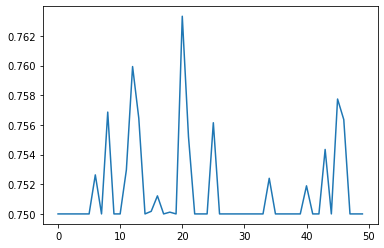

In [13]:
epochs = 50
batchSize = 1

err = np.zeros(epochs)
for i in range(epochs):
    if i%(epochs/10) == (epochs/10)-1:
        print(i+1)
    batchidx = np.random.randint(0,Xt.shape[0],batchSize)
    network.train()
    optimizer.zero_grad()
    #print(Xt[batchidx].shape)
    yP = network.forward(Xt[batchidx].reshape(boardSize[0] *boardSize[1]),Xdt[batchidx].reshape(4))
    #print(yP)     
    loss = (yP - Yt[batchidx]).pow(2).sum()
    #print(loss)
    err[i] = loss
    loss.backward()
    optimizer.step()
plt.plot(err)

1
2
3
4
5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


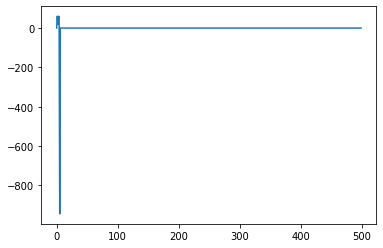

In [128]:
import copy

discountfactor = 0.9
i = 0
p = player(2,2)  # player is black
p.x = np.random.randint(0,boardSize[0])
p.y = np.random.randint(0,boardSize[1])
a = aim(8,9)   # Aim is Orange

obstacles = [
    obstacle(9,8),
    obstacle(5,5),
    obstacle(3,5),
    obstacle(7,4),
    obstacle(6,6),
    obstacle(6,5),
    obstacle(6,4)
]  
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
tH = 5
games = 100
N = tH*games
it = 0
rew = np.zeros(N)
for gasd in range(games):
    while i<tH:
        it+=1
        print(it)
        i+=1


            #agent.epsilon is set to give randomness to actions
                #agent.epsilon = 80 - counter_games

                #get old state
                #state_old = agent.get_state(game, player1, food1)
        board, data = createData(p,a,obstacles)
        board = torch.from_numpy((board.reshape(boardSize[0] *boardSize[1]).astype(np.float32)))
        board.requires_grad_()

        data = torch.from_numpy(data.astype(np.float32))
        data.requires_grad_()

        if np.random.rand(1) > 0.9:
            action = actions[np.random.randint(0, 4)]
        else:
            # predict action based on the old state
            pred = network.forward(board, data)
            action = actions[np.argmax(pred.detach().numpy())]
            #final_move = to_categorical(np.argmax(prediction[0]), num_classes=3)[0]
        #print(action)
        p.move(action)
        reward = getRewardForAction(p,a,obstacles, action)
        rew[it] = reward
        #print(reward)
        board_N, data_N = createData(p,a,obstacles)

        board_N = torch.from_numpy((board_N.reshape(boardSize[0] *boardSize[1]).astype(np.float32)))
        board_N.requires_grad_()

        data_N = torch.from_numpy(data_N.astype(np.float32))
        data_N.requires_grad_()

        pred = network.forward(board_N, data_N)
        pred_n.data = pred.clone()
        #pred_copy = copy.deepcopy(pred)
        target = reward + discountfactor * np.max(pred_n.detach().numpy())
        #print(target)
        target_f = network.forward(board, data)

        #target_f[np.argmax(action)] = target
        #print(target_f)
        network.train()
        optimizer.zero_grad()

        loss = (pred - target_f).pow(2).sum()

        loss.backward()
        optimizer.step()
plt.plot(rew)
        


In [121]:
N

2000

In [29]:
state_old = createData(p,a,obstacles)

array([3, 6, 8, 9])

In [ ]:
#perform new move and get new state
player1.do_move(final_move, player1.x, player1.y, game, food1, agent)
state_new = agent.get_state(game, player1, food1)

#set treward for the new state
reward = agent.set_reward(player1, game.crash)

#train short memory base on the new action and state
agent.train_short_memory(state_old, final_move, reward, state_new, game.crash)

# store the new data into a long term memory
agent.remember(state_old, final_move, reward, state_new, game.crash)
record = get_record(game.score, record)